#### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos in US.

#### Content
Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

#### Acknowledgements
This dataset was submitted by "Mitchell J" on kaggle. The data was retrieved through Youtube API.

#### What is done so far?
Did an Exploratory Data Analysis on the data to derive few meaningful trends through visualizations.

#### To Do's and what else can be done?
Sentiment analysis on the description to see if it effects views,likes..etc.
Analysis of what factors will help a newly uploaded video to trend.
Analyzing how to convert views into likes and comments.
(All these without taking in the actual content of the video)

~ Hemanth Kumar Gudur



## Importing Modules and Data

In [222]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [223]:
df = pd.read_csv("C:/Users/heman/USvideos.csv")
df = df.dropna()

## Checking Data

In [224]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [225]:
print(df.shape)
print(df.nunique())

(40379, 16)
video_id                   6254
trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
thumbnail_link             6255
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


## Visualize basic statistics

Adding a column name category_name to add respective categories based on their ids.
Category names were obtained form .json file available along with the data.

In [226]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Autos and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sports'
df.loc[(df["category_id"] == 18),"category_name"] = 'Short Movies'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 21),"category_name"] = 'Video Blogging'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non-Profits and Activism'
df.loc[(df["category_id"] == 30),"category_name"] = 'Movies'
df.loc[(df["category_id"] == 31),"category_name"] = 'Anime'
df.loc[(df["category_id"] == 32),"category_name"] = 'Action'
df.loc[(df["category_id"] == 33),"category_name"] = 'Classics'
df.loc[(df["category_id"] == 35),"category_name"] = 'Documentary'
df.loc[(df["category_id"] == 36),"category_name"] = 'Drama'
df.loc[(df["category_id"] == 37),"category_name"] = 'Family'
df.loc[(df["category_id"] == 38),"category_name"] = 'Foreign'
df.loc[(df["category_id"] == 39),"category_name"] = 'Horror'
df.loc[(df["category_id"] == 40),"category_name"] = 'Sci-Fi'
df.loc[(df["category_id"] == 41),"category_name"] = 'Thriller'
df.loc[(df["category_id"] == 42),"category_name"] = 'Shorts'
df.loc[(df["category_id"] == 43),"category_name"] = 'Shows'
df.loc[(df["category_id"] == 44),"category_name"] = 'Trailers'

### Number of Trending Videos Under Each Category

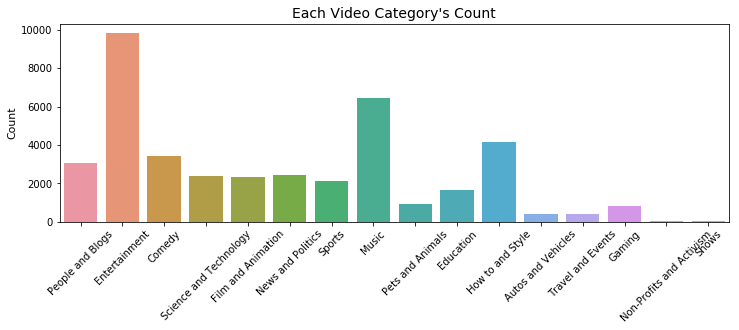

Entertainment               9819
Music                       6437
How to and Style            4140
Comedy                      3435
People and Blogs            3061
News and Politics           2409
Science and Technology      2361
Film and Animation          2340
Sports                      2125
Education                   1642
Pets and Animals             916
Gaming                       803
Travel and Events            402
Autos and Vehicles           379
Shows                         57
Non-Profits and Activism      53
Name: category_name, dtype: int64


In [227]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot('category_name', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Each Video Category's Count", fontsize=14)
g.set_xlabel("", fontsize=11)
g.set_ylabel("Count", fontsize=11)
plt.show()

print(df.category_name.value_counts())

Entertainment stands first(9819), followed by music(6437) and How to and style(4140).
We can see drastic fall in count among top 4 and slowly reducing down the line.
Keeping the content of video apart given a category we can decide what are the chances of getting their video trend.

### Number of Likes, Dislikes, Comments under each category

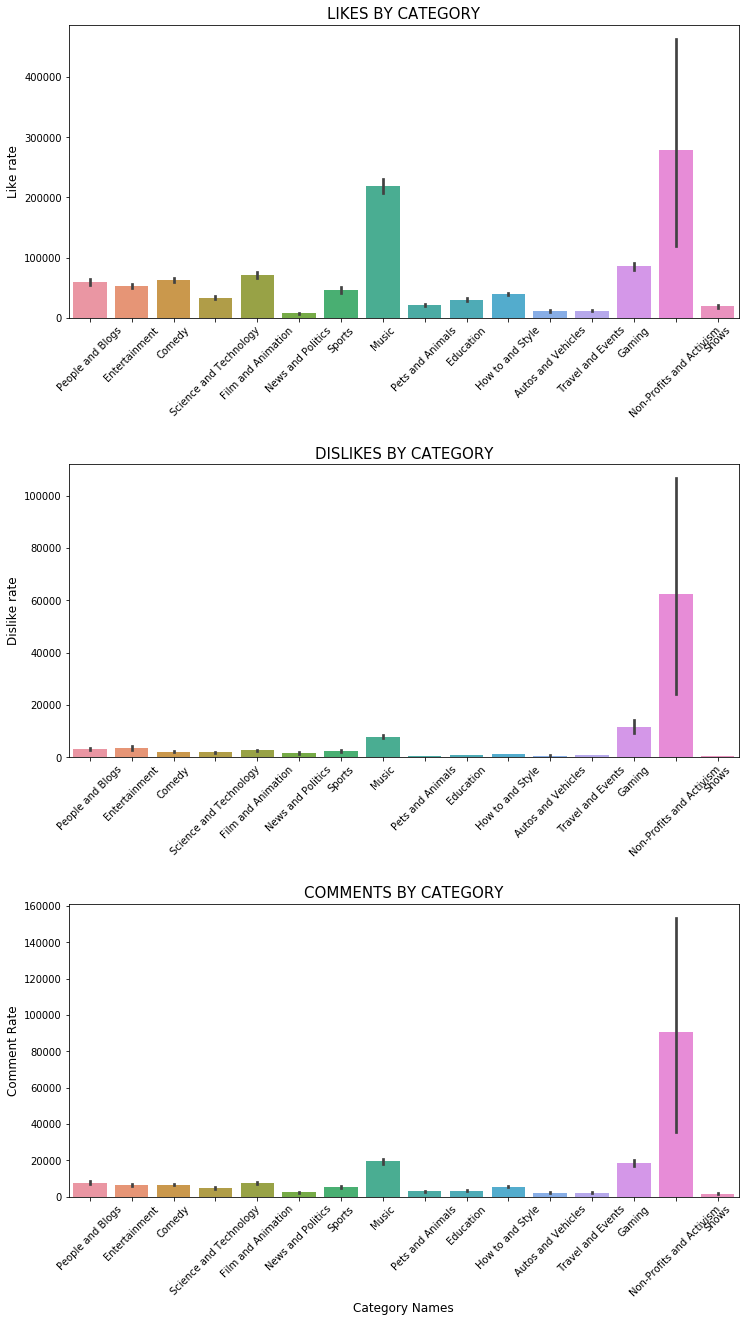

In [228]:
plt.figure(figsize = (12,21))
plt.subplot(311)
g= sns.barplot(x='category_name',y='likes',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKES BY CATEGORY", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.barplot(x='category_name',y='dislikes', data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKES BY CATEGORY", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.barplot(x='category_name',y='comment_count',data=df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENTS BY CATEGORY", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see high activity of views, likes and dislikes under the Non-Profits and activism category!

### Top 10 Most Views

Dropping duplicates to ignore the videos which trended for multiple months.

In [229]:
ff = df.drop_duplicates(subset=['title'])
sorted_df = ff.sort_values('views', ascending=False).iloc[:10]
sorted_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
23824,-BQJo3vK8O8,18.15.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Music
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,Music
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Entertainment
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
30750,u9Mv98Gr5pY,18.25.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",27973210,850362,26541,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Entertainment
4600,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
28624,U9BwWKXjVaI,18.14.04,Drake - Nice For What,DrakeVEVO,10,2018-04-07T02:46:31.000Z,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",24421448,641546,16517,42949,https://i.ytimg.com/vi/U9BwWKXjVaI/default.jpg,False,False,False,Music video by Drake performing Nice For What....,Music
38161,1J76wN0TPI4,18.01.06,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30T07:51:32.000Z,"Sanju|""Official Trailer""|""sanju official trail...",23758250,587326,18799,43728,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...,Entertainment


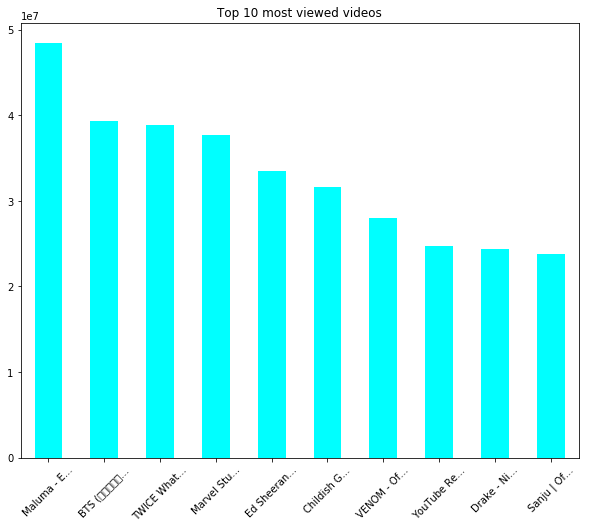

In [230]:
plt.figure(figsize = (10,8))
ax = sorted_df['views'].plot.bar(color=['cyan'])
labels = []
for item in sorted_df['title']:
    labels.append(item[:10] + '...')
ax.set_xticklabels(labels, rotation=45, fontsize=10)
ax.set_title('Top 10 most viewed videos')    
plt.show()

### Top 10 Most Liked videos

In [231]:
sorted_df = ff.sort_values('likes', ascending=False).iloc[:10]
sorted_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
2201,kTlv5_Bs8aw,17.25.11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",13945717,2055137,23888,395562,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music
21173,OK3GJ0WIQ8s,18.02.03,j-hope 'Daydream (백일몽)' MV,ibighit,10,2018-03-01T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",10695328,2050527,14711,387384,https://i.ytimg.com/vi/OK3GJ0WIQ8s/default.jpg,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Music
33151,p8npDG2ulKQ,18.07.05,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,10,2018-05-06T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",10666323,1956202,13966,285583,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Music
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Entertainment
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music
28156,kX0vO4vlJuU,18.06.04,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,10,2018-04-05T15:00:05.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",7518332,1572997,8113,180262,https://i.ytimg.com/vi/kX0vO4vlJuU/default.jpg,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Music
38352,D_6QmL6rExk,18.02.06,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,ibighit,10,2018-06-01T15:00:01.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""fak...",5884233,1437859,6390,134721,https://i.ytimg.com/vi/D_6QmL6rExk/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Music
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
22174,8O_MwlZ2dEg,18.07.03,j-hope 'Airplane' MV,ibighit,10,2018-03-06T15:00:10.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",5275672,1401915,6268,158127,https://i.ytimg.com/vi/8O_MwlZ2dEg/default.jpg,False,False,False,j-hope 'Airplane' MV\n\n\n\nj-hope - 'Hope Wor...,Music


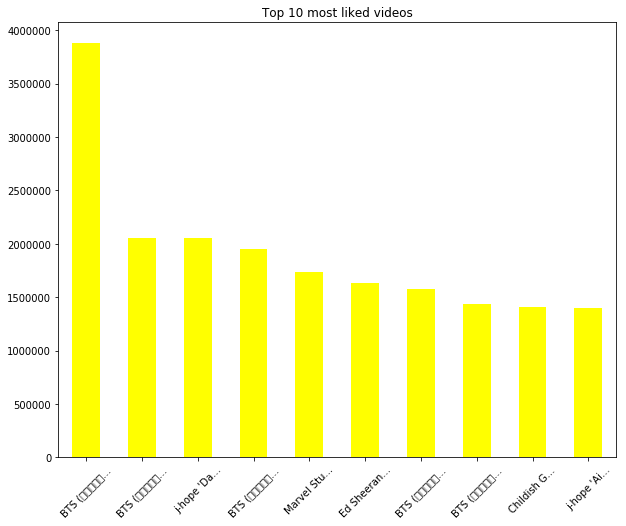

In [232]:
plt.figure(figsize = (10,8))
ax = sorted_df['likes'].plot.bar(color=['yellow'])
labels = []
for item in sorted_df['title']:
    labels.append(item[:10] + '...')
ax.set_xticklabels(labels, rotation=45, fontsize=10)
ax.set_title('Top 10 most liked videos')    
plt.show()

### Top 10 most disliked videos

In [233]:
sorted_df = ff.sort_values('dislikes', ascending=False).iloc[:10]
sorted_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
4600,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
16825,_5d-sQ7Fh5M,18.08.02,LOGAN PAUL IS BACK!,Logan Paul Vlogs,24,2018-02-04T22:02:27.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",13754992,1207457,280675,432534,https://i.ytimg.com/vi/_5d-sQ7Fh5M/default.jpg,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Entertainment
7116,LFhT6H6pRWg,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,People and Blogs
35752,ooyjaVdt-jA,18.20.05,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",6886948,285349,164004,115501,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Gaming
14000,oWjxSkJpxFU,18.25.01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",8041970,1167488,147643,363133,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Non-Profits and Activism
19376,V5cOvyDpWfM,18.21.02,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,17,2018-02-19T01:37:11.000Z,"mlg highlights|""mlg""|""basketball""|""highlights""...",14647590,32892,117128,44404,https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Sports
6201,8d_202l55LU,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,News and Politics
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,Music
5602,khPLWaBioOs,17.12.12,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,24,2017-12-10T21:32:44.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",7691902,761852,86475,135159,https://i.ytimg.com/vi/khPLWaBioOs/default.jpg,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,Entertainment
36950,jE2VvGZktJo,18.26.05,Jake Paul - Randy Savage (FT. Team 10 + Jitt &...,Jake Paul,22,2018-05-24T23:17:52.000Z,"Jake|""Paul""|""logan""|""paul""|""its""|""every""|""day""...",2974188,126093,83954,43019,https://i.ytimg.com/vi/jE2VvGZktJo/default.jpg,False,False,False,DOWNLOAD THIS SONG ON ITUNES NOW!! http://bit....,People and Blogs


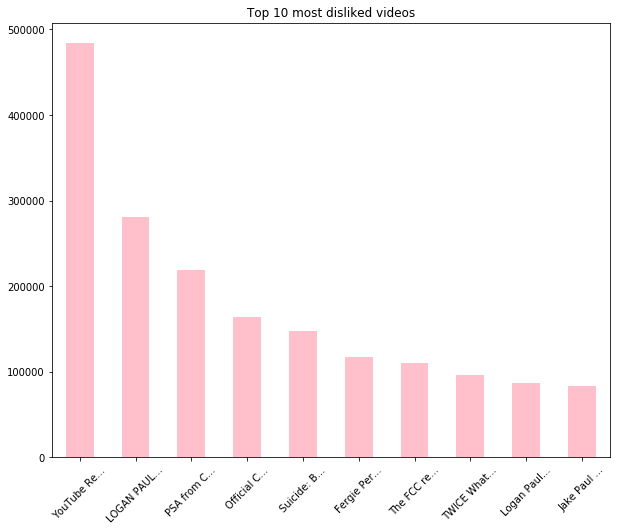

In [234]:
plt.figure(figsize = (10,8))
ax = sorted_df['dislikes'].plot.bar(color=['pink'])
labels = []
for item in sorted_df['title']:
    labels.append(item[:10] + '...')
ax.set_xticklabels(labels, rotation=45, fontsize=10)
ax.set_title('Top 10 most disliked videos')   
plt.show()

### Top 10 Videos with most comments

In [235]:
sorted_df = ff.sort_values('comment_count', ascending=False).iloc[:10]
sorted_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
4600,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
16825,_5d-sQ7Fh5M,18.08.02,LOGAN PAUL IS BACK!,Logan Paul Vlogs,24,2018-02-04T22:02:27.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",13754992,1207457,280675,432534,https://i.ytimg.com/vi/_5d-sQ7Fh5M/default.jpg,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Entertainment
2201,kTlv5_Bs8aw,17.25.11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",13945717,2055137,23888,395562,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music
21173,OK3GJ0WIQ8s,18.02.03,j-hope 'Daydream (백일몽)' MV,ibighit,10,2018-03-01T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",10695328,2050527,14711,387384,https://i.ytimg.com/vi/OK3GJ0WIQ8s/default.jpg,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Music
14000,oWjxSkJpxFU,18.25.01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",8041970,1167488,147643,363133,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Non-Profits and Activism
28962,FhllRWReNEE,18.16.04,Melting Every Lipstick From Sephora Together,Safiya Nygaard,22,2018-04-14T19:55:26.000Z,"melting every lipstick from sephora together|""...",4776071,306005,5760,321455,https://i.ytimg.com/vi/FhllRWReNEE/default.jpg,False,False,False,We melted one of every lipstick from Sephora t...,People and Blogs
33151,p8npDG2ulKQ,18.07.05,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,10,2018-05-06T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",10666323,1956202,13966,285583,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Music
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Entertainment
39149,J2HytHu5VBI,18.06.06,we broke up,David Dobrik,22,2018-06-05T04:54:35.000Z,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",16884972,1366736,59930,237907,https://i.ytimg.com/vi/J2HytHu5VBI/default.jpg,False,False,False,Sorry we didn't let you know sooner... we want...,People and Blogs


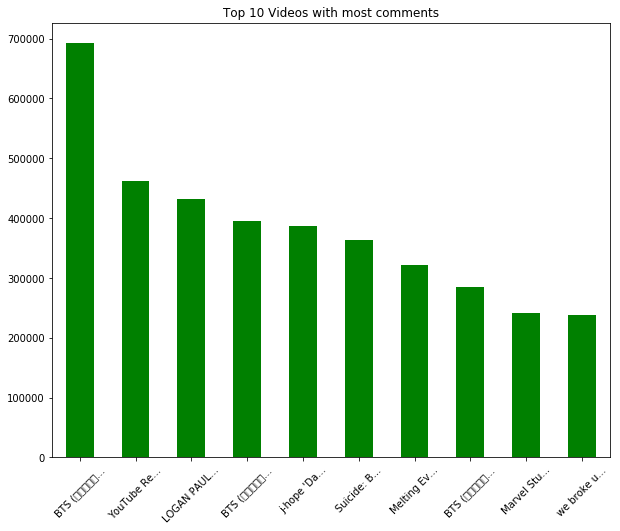

In [236]:
plt.figure(figsize = (10,8))
ax = sorted_df['comment_count'].plot.bar(color=['green'])
labels = []
for item in sorted_df['title']:
    labels.append(item[:10] + '...')
ax.set_xticklabels(labels, rotation=45, fontsize=10)
ax.set_title('Top 10 Videos with most comments')    
plt.show()

### Visualize how the features are correlated through a heat map

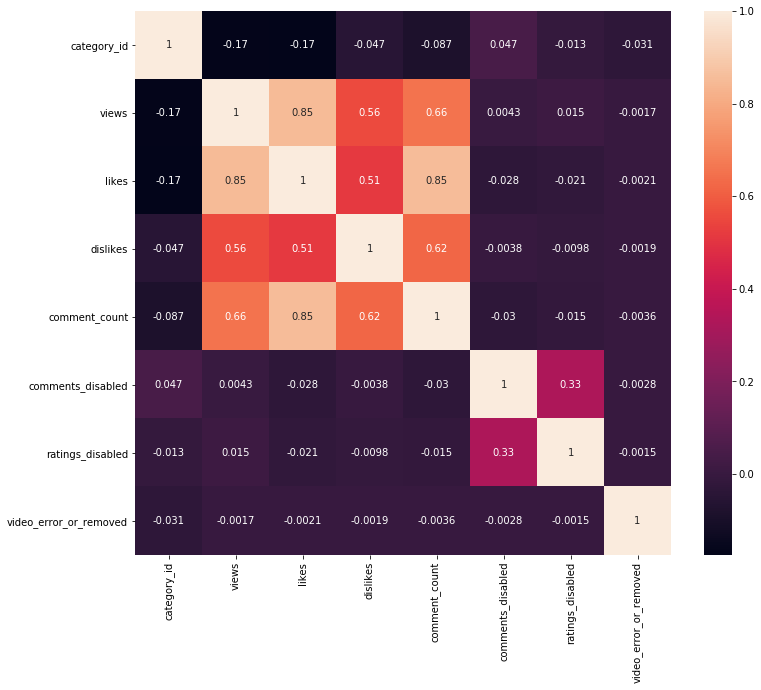

In [237]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True)

We can see interesting correlation between views, likes, dislikes and comment_count.


### Visualize relationship between views and {likes, dislikes, comments}

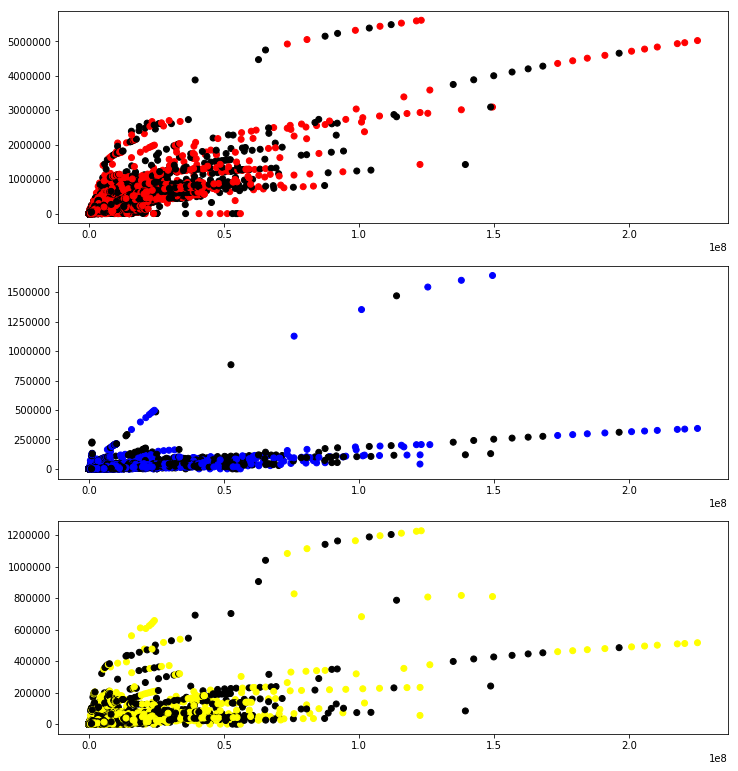

In [238]:
plt.figure(figsize = (12,18))
plt.subplot(411)
plt.scatter(df['views'],df['likes'],color=['black','red'])
plt.subplot(412)
plt.scatter(df['views'],df['dislikes'],color=['black','blue'])
plt.subplot(413)
plt.scatter(df['views'],df['comment_count'],color=['black','yellow'])

We can see visible trends of relationship between views and the number of likes,dislikes and comments. 